# Capstone Project - The Battle of Neighborhoods (Week 2)

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
- [Introduction](#introduction)
- [Data Description](#data)
- [Methodology](#methodology)
- [Analysis](#analysis)
- [Results and Discussion](#result)
- [Conclusion](#conclusion)
- [Reference](#reference)


## **Introduction**<a name="introduction"></a>

### **Discussion of the background and Description of the problem:**

Toronto, the capital of the province of Ontario, is the largest city of Canada with population over 2,826,498, and it is one of the most multicultural cities in the world, with immigrants bringing in their traditions, languages and especially their food culture into the city. **[1]**

Therefore, food service industry is one of the very important and yet competitive industries in Toronto to serve this highly populated and diversified city.  And finding of the best places for opening up new restaurants in Toronto are particularly important for restaurant investors to minimize their risk when entering into the restaurant food service sector.

However, due to Toronto’s historical immigration reasons and multicultural nature, different ethnic groups would have established their own ethnic community areas and preferred activity neighborhoods; this might affect new restaurants’ success and might add risks for the investors if restaurant location to their target restaurant clients are not matching properly.

So, we would like to use the tools of Data Science to find the best possible successful location for a new restaurant for particular ethic style restaurant (in this case, location for a new Chinese restaurant).   We would like to use data analysis to consider the proposed restaurant locations’ population, and locations’ existing ethic food preference in recommendation of new restaurant locations.



## **Data Description and how these data will be used to solve the problem:** <a name="data"></a>


#### **Data Analysis (i.e. Data Requirement and Data Collection):**

Data from the Government of Canadia Census 2016 data for Toronto, the venue exploration data from the Foursquare API, as well as Geometric data would be utilized for this new restaurant location search.

**1)**  **Pseudo-Household Demographic Distribution data from the Government of Canada Open Government site** (i.e. https://open.canada.ca/data/en/dataset/b3a1d603-19ca-466c-ae95-b5185e56addf ) would be used as population information source for the proposed location data.  **__[2]__**

The Pseudo-Household Demographic Distribution is a geospatial representative distribution of demographic data (population and households) derived from the Canadian Census from Statistics Canada.  

Pseudo-household demographics are currently used to calculate broadband Internet service availability, but are equally applicable to other disciplines requiring a spatial distribution of households or population.   And in our case, we would utilize this population data in help to search for new best restaurant location candidates.

We would use _Python Pandas_ package’s read_csv function to read in specific Pseudo-Household Demographic Distribution data .csv format file.   

Due to the large size of the original Government Canada Pseudo-Household Demographic Distribution .csv file for the whole Ontario, we would first remove extra unnecessary data outside of Toronto and would focus analysis on Toronto related data.


**2)**  **FourSquare API data** would be used to get existing restaurant ethnic style information from Foursquare database for various restaurant location candidates in Toronto. **__[3]__**

**3)** Python geopy geocoder classes for the **OpenStreetMap Nominatim database** would be used to handle geometric data lookup on getting the actual physical proposed restaurant locations from the final location candidates. **[4]**

## **Methodlogy:** <a name="methodlogy"></a>

#### **Methodlogy on Data Understanding and Data Preparation:**

##### **1. Descriptive statistics:**

In order to better understand the above data sources on population and location venues if there were any relationship to restaurant location and to access their data quality, we would use _Python Pandas, Numpy and Matplotlib libraries_ to perform descriptive statistics such as **Univariate statistics** (i.e. mean, minimum, maximum and standard deviation) and to see how variables are distributed and what sorts of data preparation may be needed to make variables more useful in model.


##### **2. Feature Engineering:**

We would use our domain knowledge of restaurant operation and understanding of data sources form above descriptive statistics analysis to perform Feature Engineering and to create features that make the machine learning algorithms work. 


##### **3. Model Evaluation:**

Since we are trying to find possible location grouping for restaurant, we would use the _Python SKLearn package_ to model **Unsupervised Learning method K-Means**.  And we would perform **Statistical Significance Testing** to tune and optimize the K-Means model.


##### **4. Data Visualization:**

We would use **Histogram** to analysis and  _Python Folium library_ for map visualization of the final proposed restaurant locations in a Toronto map.  And we would use _Python geopy geocoder classes for the OpenStreetMap Nominatim_ to get their actual physical location addresses.



#### **A) Coding on Data preparation for Toronto Census Population Data:**

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import matplotlib.pyplot as plt
print('Libraries imported.')



Libraries imported.


#### Get Toronto's Pseudo-Household Demographic Distribution from government site:
Due to the large size of the original Government Canada Pseudo-Household Demographic Distribution .csv file for the whole Ontario, we would first remove extra unnecessary data outside of Toronto and would focus analysis on Toronto related data.

In [2]:
toronto_csv = pd.read_csv("PHH-ON_Toronto.csv")
print(toronto_csv.shape)
toronto_csv.head()

(40845, 10)


,PHH_ID,Type,POP,TDwell2016_TLog2016,URDwell2016_RH2016,DBUID_Ididu,HEXUID_IdUHEX,Pruid_Pridu,Latitude,Longitude
0,1798025,6,25.900000,5.900000,5.650000,35203509002,ON43690793,35,43.692913,-79.280054
1,1744786,3,32.777778,21.555556,21.333333,35200647003,ON43690793,35,43.683868,-79.280067
2,1798613,1,0.000000,0.000000,0.000000,35203532009,ON43740793,35,43.731089,-79.280076
3,1793069,4,19.600000,7.000000,7.000000,35203246007,ON43690793,35,43.684816,-79.280076
4,1798099,3,33.250000,11.000000,10.750000,35203512003,ON43690793,35,43.695481,-79.280081


#### Based on the Data Dictionary of the fields from the government site, we cleaned up the dataset to remove unnecessary columns (eg. PHH_ID, Pruid_Pridu, TDwell2016_TLog2016) and renamed columns to get better column names:

Field | Description
--|--
PHH_ID|Unique identifier for pseudo-household (PHH) representative point
Type|PHH Type:
 |1 = Centroid of a 2016 Census dissemination block,
 |2 = Atlas of Canada Placename point, 
 |3 = 2016 Census Road Network Address Range Left,
 |4 = 2016 Census Road Network Address Range Right,
 |5 = Previous representative point Left,
 |6 = Previous representative point Right 
Pop2016|PHH representative population
TDwell2016_TLog2016|PHH representative total private dwellings
URDwell2016_RH2016|PHH representative private dwellings occupied by usual residents
DBUID_Ididu|2016 Census dissemination block 
HEXUID_IdUHEX|Hexagon identifier
Pruid_Pridu|Province or territory name
Latitude|Latitude for the PHH representative point
Longitude|Longitude for the PHH representative point




In [3]:
df_toronto = toronto_csv.drop(['PHH_ID', 'TDwell2016_TLog2016', 'Pruid_Pridu', 'HEXUID_IdUHEX'], axis=1)
df_toronto.rename(columns={'POP':'population', 'URDwell2016_RH2016':'res_dwelling', 'DBUID_Ididu':'census_blk', 'HEXUID_IdUHEX':'hex_id'} , inplace=True)
print(df_toronto.shape)
df_toronto.head()

(40845, 6)


,Type,population,res_dwelling,census_blk,Latitude,Longitude
0,6,25.900000,5.650000,35203509002,43.692913,-79.280054
1,3,32.777778,21.333333,35200647003,43.683868,-79.280067
2,1,0.000000,0.000000,35203532009,43.731089,-79.280076
3,4,19.600000,7.000000,35203246007,43.684816,-79.280076
4,3,33.250000,10.750000,35203512003,43.695481,-79.280081


#### Get the centroid location of census block groups as the location of each census block.

In [4]:
df_census_blk_locs = df_toronto.loc[ toronto_csv.loc[:, "Type"] == 1, ['census_blk', 'Latitude', 'Longitude'] ]
df_census_blk_locs.reset_index( inplace= True)
df_census_blk_locs.drop(['index'], axis=1, inplace=True)
print(df_census_blk_locs.shape)
df_census_blk_locs.head()

(5653, 3)


,census_blk,Latitude,Longitude
0,35203532009,43.731089,-79.280076
1,35203482017,43.716151,-79.280262
2,35203540004,43.742792,-79.280296
3,35203246001,43.685849,-79.280398
4,35203482007,43.723537,-79.280427


#### Remove data rows with no population or dwelling (i.e. highway or parks).  We are only interested in areas where there are population with needs for restaurant.

In [5]:
indexNoPopNoDwell = df_toronto[ (df_toronto['population'] == 0) | (df_toronto['res_dwelling'] == 0)].index
df_toronto.drop(indexNoPopNoDwell , inplace=True)

# reset index after dropped rows
df_toronto.reset_index(drop=True, inplace=True)
print(df_toronto.shape)

(34706, 6)


#### Find the population and dwelling sum on each census block.

In [6]:
df_census_pop = df_toronto.groupby('census_blk').agg({"population" :['sum'], "res_dwelling" :['sum']})
df_census_pop.columns = ["_".join(x) for x in df_census_pop.columns.ravel()]
df_census_pop.reset_index( inplace= True)
df_census_pop.head()

,census_blk,population_sum,res_dwelling_sum
0,35200374002,54.000000,21.000000
1,35200374003,238.000000,99.000000
2,35200374004,96.615385,36.923077
3,35200375005,73.000000,29.000000
4,35200375006,86.142857,33.428571


#### Merge census blocks population and location information together, and verify results.

In [7]:
df_census_blks = pd.merge(df_census_pop, df_census_blk_locs, on='census_blk')
print(df_census_blks.shape)
df_census_blks.head()

(4906, 5)


,census_blk,population_sum,res_dwelling_sum,Latitude,Longitude
0,35200374002,54.0,21.0,43.750348,-79.380589
1,35200374003,238.0,99.0,43.749567,-79.382978
2,35200375005,73.0,29.0,43.750505,-79.383083
3,35200376001,426.0,130.0,43.746556,-79.377856
4,35200376002,59.0,19.0,43.748757,-79.378210


In [8]:
# Verify result on the merge operation - 1
df_census_blk_locs['census_blk'].isin(df_census_pop['census_blk']).value_counts()

True     4906
False     747
Name: census_blk, dtype: int64

In [9]:
# Verify result of the merge operation - 2
df_census_pop['census_blk'].isin(df_census_blk_locs['census_blk']).value_counts()

True     4906
False      67
Name: census_blk, dtype: int64

#### The Merging operation seems ok.  Noticed that there are some census block population data rows which does not have matching location rows and vice versa.  This probably due to non-populated areas (i.e. highway and parks) which we removed earlier, or related to locations around the city boundaries.   Thus, that’s ok.


##### We would now perform some initial Descriptive Statistics to the Population and Residental Dwelling data.

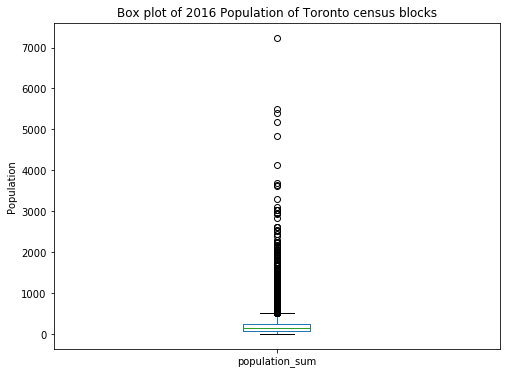

In [10]:
### BoxPlot on Population of all Toronto census blocks

df_census_blks.iloc[ : ,[1] ].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of 2016 Population of Toronto census blocks')
plt.ylabel('Population')
plt.show()

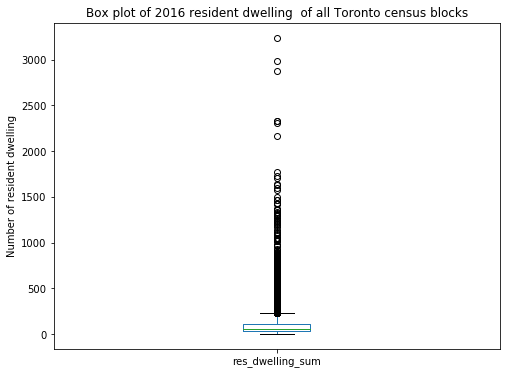

In [11]:
### BoxPlot on Resident dwelling of all Toronto selected census blocks

df_census_blks.iloc[ : ,[2] ].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of 2016 resident dwelling  of all Toronto census blocks')
plt.ylabel('Number of resident dwelling')
plt.show()

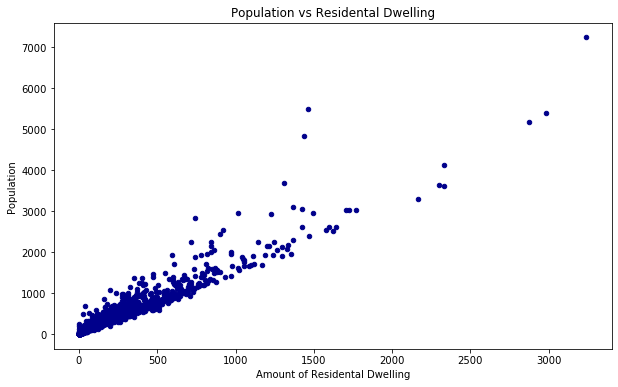

In [12]:
df_census_blks.plot(kind='scatter', x='res_dwelling_sum', y='population_sum', figsize=(10, 6), color='darkblue')
plt.title('Population vs Residental Dwelling')
plt.xlabel('Amount of Residental Dwelling')
plt.ylabel('Population')
plt.show()

#### From the above Box and Scatter plots, notices that population are not evenly distributed among census blocks within city Toronto.   Most census block areas are having very modest population (below 500), and there are a number of outliers that are having very high population, to as high as over 7000 population within the block.  

#### Since one of the successful factors for successful new restaurant is the number of potential customers, so higher the population among the restaurant's neighborhood would be the better.  So, we would focus our further analysis on block areas with population greater than 2500. 

In [13]:
# Areas with population greater than 2500
df_census_blks_GT25 = pd.DataFrame(df_census_blks.loc[df_census_blks.loc[:, 'population_sum'] >  2500,  : ])

# Sort census block based on population density
df_census_blks_GT25.sort_values(['population_sum'], ascending=False, inplace=True)

print(df_census_blks_GT25.shape)
df_census_blks_GT25.head()

(25, 5)


,census_blk,population_sum,res_dwelling_sum,Latitude,Longitude
4565,35204567001,7244.000000,3240.0,43.668674,-79.371902
4102,35204074001,5498.000000,1463.0,43.701554,-79.341123
4800,35204819002,5410.000000,2985.0,43.640416,-79.397862
4087,35204049014,5190.999999,2875.0,43.731038,-79.327276
4101,35204073006,4849.000001,1434.0,43.705947,-79.339509


#### Perform Descriptive Statistics again to these 25 blocks with Population greater than 2500.

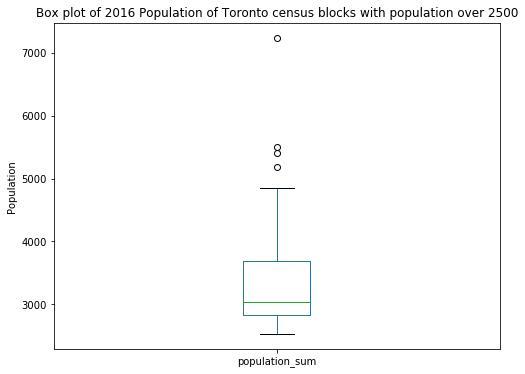

In [14]:
### BoxPlot on population of the selected 25 census blocks

df_census_blks_GT25.iloc[ : ,[1] ].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of 2016 Population of Toronto census blocks with population over 2500')
plt.ylabel('Population')

plt.show()

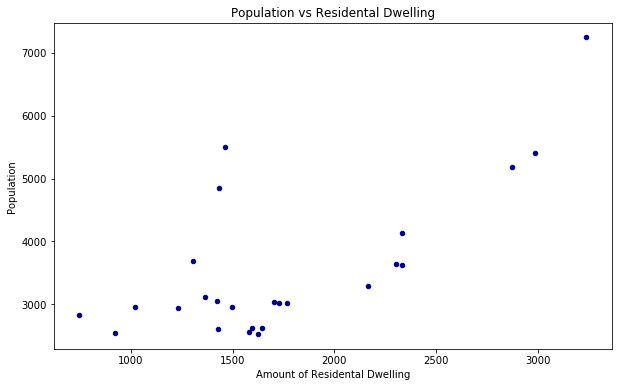

In [15]:
df_census_blks_GT25.plot(kind='scatter', x='res_dwelling_sum', y='population_sum', figsize=(10, 6), color='darkblue')

plt.title('Population vs Residental Dwelling')
plt.xlabel('Amount of Residental Dwelling')
plt.ylabel('Population')

plt.show()

#### Good! These looks better.
#### Now, we would use Foursquare to see sample data with venue information related to these 25 selected areas. 

#### **B) Coding on Data preparation for Foursquare Venue Data:**

#### Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = 'EIXAIKKXGND2YFYGL2YCMFTFHXC1BCUXULBNCPMCW3PR2NEP' # your Foursquare ID
CLIENT_SECRET = 'E55GTLP2MO4KGK3CLZ3GL2XZ21DUUZUQXI32ODPZPUC2PDOH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: EIXAIKKXGND2YFYGL2YCMFTFHXC1BCUXULBNCPMCW3PR2NEP
CLIENT_SECRET:E55GTLP2MO4KGK3CLZ3GL2XZ21DUUZUQXI32ODPZPUC2PDOH


#### Define function to extract category of the venue

In [17]:
#### Define function to extract category of the venue
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Set up Foursquare LIMIT and radius
#### Write code to run the above function on each of the 25 most populated census block and create a new dataframe called *toronto_venues*.

In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

toronto_venues = getNearbyVenues(names=df_census_blks_GT25['census_blk'],
                                   latitudes=df_census_blks_GT25['Latitude'],
                                   longitudes=df_census_blks_GT25['Longitude']
                                  )

35204567001
35204074001
35204819002
35204049014
35204073006
35204606002
35204371001
35204676002
35204872001
35204004002
35204464001
35204564001
35204588001
35204900009
35204653009
35204367001
35204024001
35204072006
35204796001
35204826004
35204380001
35204666003
35204650006
35203520005
35204578001


#### Let's check the size of the resulting dataframe

In [19]:
print(toronto_venues.shape)
toronto_venues.head()

(1033, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,35204567001,43.668674,-79.371902,Cranberries,43.667843,-79.369407,Diner
1,35204567001,43.668674,-79.371902,Mr. Jerk,43.667328,-79.373389,Caribbean Restaurant
2,35204567001,43.668674,-79.371902,F'Amelia,43.667536,-79.368613,Italian Restaurant
3,35204567001,43.668674,-79.371902,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
4,35204567001,43.668674,-79.371902,Murgatroid,43.667381,-79.369311,Restaurant


#### Analyze each selected populated census block, with specific focus on information related to Restaurant.

In [20]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

restaurant_cols = [col for col in toronto_onehot.columns if 'Restaurant' in col]
toronto_restaurants = pd.merge(toronto_venues['Neighborhood'] , toronto_onehot[restaurant_cols], right_index=True, left_index=True)
toronto_restaurants.head()


,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,35204567001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,35204567001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35204567001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35204567001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35204567001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### And we would like to see the locations of these 25 most populated blocks in Toronto.

#### We use geopy library to get the latitude and longitude values of City Toronto, Ontario.

In [21]:
address = 'Toronto, ONT'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6781255, -79.6321235335026.


#### Then we create a map of Toronto, Ontario with the top 25 most populated areas superimposed on top.

In [22]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, census_blk, population_sum in zip(df_census_blks_GT25['Latitude'], df_census_blks_GT25['Longitude'], df_census_blks_GT25['census_blk'], df_census_blks_GT25['population_sum']):
    label = '{}, {}'.format(population_sum, census_blk)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Now we have done some initial analysis, data preparation and visualization of the 25 new restaurant location candidates.  
#### We would do further analysis on location neighborhood's ethnic food style preference and modeling.

## **Analysis:** <a name="analysis"></a>

#### **A) Coding on Foursquare Venue Data Analysis:**

#### Besides the number of potential customers (i.e.  population among the restaurant's neighborhood ), the matching of service to the target customer is another successful factors for successful new restaurant start up (i.e. matching of the Restaurant ethnic food style with the potential customers' food preference). 

#### We are looking for locations to open up a new Chinese restaurant in neighborhood locations that have an existing preference to ethic food style similar to Chinese food.

#### Since Chinese food is considered to be in the Oriental-Food style category, with its food being prepared using recipes or in a style resembling that used in countries of East Asia, including Japanese, Tai, Korean etc; so, neighborhood locations having existing preference to Japanese, Tai, Korean as well as Chinese food would be better location candidates for new Chinese restaurant with more potential customers. 

#### For better further analysis to our restaurant location search, we are going to classify and focus on venue information related to the five main Oriental Food preference styles (i.e. Oriential Chinese, Oriential Japanese, Oriential Korean, Oriential Thai and Oriential Vietnamese).  



In [23]:
resStyleDictionary = {  'Chinese Restaurant'            : 'Style Oriental Chinese'
                      , 'Anhui Restaurant'              : 'Style Oriental Chinese'
                      , 'Beijing Restaurant'            : 'Style Oriental Chinese'
                      , 'Cantonese Restaurant'          : 'Style Oriental Chinese'
                      , 'Chinese Aristocrat Restaurant' : 'Style Oriental Chinese'
                      , 'Dim Sum Restaurant'            : 'Style Oriental Chinese'
                      , 'Dongbei Restaurant'            : 'Style Oriental Chinese'
                      , 'Dumpling Restaurant'           : 'Style Oriental Chinese'
                      , 'Fujian Restaurant'             : 'Style Oriental Chinese'
                      , 'Guizhou Restaurant'            : 'Style Oriental Chinese'
                      , 'Hainan Restaurant'             : 'Style Oriental Chinese'
                      , 'Hakka Restaurant'              : 'Style Oriental Chinese'
                      , 'Henan Restaurant'              : 'Style Oriental Chinese'
                      , 'Hong Kong Restaurant'          : 'Style Oriental Chinese'
                      , 'Hotpot Restaurant'             : 'Style Oriental Chinese'
                      , 'Huaiyang Restaurant'           : 'Style Oriental Chinese'
                      , 'Hubei Restaurant'              : 'Style Oriental Chinese'
                      , 'Hunan Restaurant'              : 'Style Oriental Chinese'
                      , 'Imperial Restaurant'           : 'Style Oriental Chinese'
                      , 'Jiangsu Restaurant'            : 'Style Oriental Chinese'
                      , 'Jiangxi Restaurant'            : 'Style Oriental Chinese'
                      , 'Macanese Restaurant'           : 'Style Oriental Chinese'
                      , 'Manchu Restaurant'             : 'Style Oriental Chinese'
                      , 'Peking Duck Restaurant'        : 'Style Oriental Chinese'
                      , 'Shaanxi Restaurant'            : 'Style Oriental Chinese'
                      , 'Shandong Restaurant'           : 'Style Oriental Chinese'
                      , 'Shanghai Restaurant'           : 'Style Oriental Chinese'
                      , 'Shanxi Restaurant'             : 'Style Oriental Chinese'
                      , 'Szechuan Restaurant'           : 'Style Oriental Chinese'
                      , 'Taiwanese Restaurant'          : 'Style Oriental Chinese'
                      , 'Tianjin Restaurant'            : 'Style Oriental Chinese'
                      , 'Xinjiang Restaurant'           : 'Style Oriental Chinese'
                      , 'Yunnan Restaurant'             : 'Style Oriental Chinese'
                      , 'Zhejiang Restaurant'           : 'Style Oriental Chinese'
                      , 'Japanese Restaurant'           : 'Style Oriental Japanese'
                      , 'Donburi Restaurant'            : 'Style Oriental Japanese'
                      , 'Japanese Curry Restaurant'     : 'Style Oriental Japanese'
                      , 'Kaiseki Restaurant'            : 'Style Oriental Japanese'
                      , 'Kushikatsu Restaurant'         : 'Style Oriental Japanese'
                      , 'Monjayaki Restaurant'          : 'Style Oriental Japanese'
                      , 'Nabe Restaurant'               : 'Style Oriental Japanese'
                      , 'Okonomiyaki Restaurant'        : 'Style Oriental Japanese'
                      , 'Ramen Restaurant'              : 'Style Oriental Japanese'
                      , 'Shabu-Shabu Restaurant'        : 'Style Oriental Japanese'
                      , 'Soba Restaurant'               : 'Style Oriental Japanese'
                      , 'Sukiyaki Restaurant'           : 'Style Oriental Japanese'
                      , 'Sushi Restaurant'              : 'Style Oriental Japanese'
                      , 'Tempura Restaurant'            : 'Style Oriental Japanese'
                      , 'Tonkatsu Restaurant'           : 'Style Oriental Japanese'
                      , 'Udon Restaurant'               : 'Style Oriental Japanese'
                      , 'Unagi Restaurant'              : 'Style Oriental Japanese'
                      , 'Yakitori Restaurant'           : 'Style Oriental Japanese'
                      , 'Yoshoku Restaurant'            : 'Style Oriental Japanese'
                      , 'Korean Restaurant'             : 'Style Oriental Korean'
                      , 'Bossam/Jokbal Restaurant'      : 'Style Oriental Korean'
                      , 'Gukbap Restaurant'             : 'Style Oriental Korean'
                      , 'Janguh Restaurant'             : 'Style Oriental Korean'
                      , 'Samgyetang Restaurant'         : 'Style Oriental Korean'
                      , 'Thai Restaurant'               : 'Style Oriental Thai'
                      , 'Som Tum Restaurant'            : 'Style Oriental Thai'
                      , 'Satay Restaurant'              : 'Style Oriental Thai'
                      , 'Vietnamese Restaurant'         : 'Style Oriental Vietnamese'
                     }
 

#### We check onto the selected 25 Toronto's most populated census blocks on their venue information to get further information data on the neighborhoods' ethnic food preference.

In [24]:
toronto_res_style = toronto_restaurants.groupby(resStyleDictionary, axis=1).sum(axis=1)
print(toronto_res_style.shape)
toronto_res_style.head()

(1033, 5)


,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [25]:
#  Add back in Neighborhood/ census block to dataframe
df_toronto_res_style = pd.merge(toronto_restaurants['Neighborhood'], toronto_res_style, right_index=True, left_index=True)

print(df_toronto_res_style.shape)
df_toronto_res_style.head()

(1033, 6)


,Neighborhood,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
0,35204567001,0,0,0,0,0
1,35204567001,0,0,0,0,0
2,35204567001,0,0,0,0,0
3,35204567001,0,0,0,0,0
4,35204567001,0,0,0,0,0


#### Group rows by neighborhood on the selected 25 locations, and by taking the mean of the frequency of occurrence of each Oriental Food Style category.

In [26]:
df_toronto_res_style_grouped = df_toronto_res_style.groupby('Neighborhood').mean().reset_index()
df_toronto_res_style_grouped

,Neighborhood,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
0,35203520005,0.000000,0.000000,0.000000,0.000000,0.000000
1,35204004002,0.000000,0.089552,0.000000,0.014925,0.014925
2,35204024001,0.000000,0.000000,0.000000,0.000000,0.000000
3,35204049014,0.000000,0.000000,0.000000,0.000000,0.000000
4,35204072006,0.000000,0.000000,0.000000,0.000000,0.000000
5,35204073006,0.000000,0.000000,0.000000,0.000000,0.000000
6,35204074001,0.000000,0.000000,0.000000,0.000000,0.000000
7,35204367001,0.000000,0.000000,0.000000,0.000000,0.000000
8,35204371001,0.000000,0.000000,0.000000,0.000000,0.000000
9,35204380001,0.000000,0.027027,0.000000,0.000000,0.027027


#### Now, we would like to setup a k-means model and see if there are any clustering or further information being reviewed relating to Orient Style Food preference.

#### **B) Coding on Modelling:**

#### Run k-means to cluster the neighborhood into 3 clusters.

In [27]:
# set number of clusters
kclusters = 3

df_toronto_res_style_grouped_clustering = df_toronto_res_style_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_toronto_res_style_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:] 

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0,
       0, 2, 0])

#### Create a new dataframe that includes the cluster as well as the restaurant style preference percentage.

In [28]:
# add clustering labels
df_toronto_res_style_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_census_blks_GT25

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df_toronto_res_style_grouped.set_index('Neighborhood'), on='census_blk')

toronto_merged.head() # check the last columns!

,census_blk,population_sum,res_dwelling_sum,Latitude,Longitude,Cluster Labels,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
4565,35204567001,7244.000000,3240.0,43.668674,-79.371902,0,0.0,0.026316,0.0,0.0,0.0
4102,35204074001,5498.000000,1463.0,43.701554,-79.341123,2,0.0,0.000000,0.0,0.0,0.0
4800,35204819002,5410.000000,2985.0,43.640416,-79.397862,0,0.0,0.051724,0.0,0.0,0.0
4087,35204049014,5190.999999,2875.0,43.731038,-79.327276,2,0.0,0.000000,0.0,0.0,0.0
4101,35204073006,4849.000001,1434.0,43.705947,-79.339509,2,0.0,0.000000,0.0,0.0,0.0


#### Visualize the resulting clusters.

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['census_blk'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### Examine Clusters:

#### Let's examine the k-means clustering result.
#### We would print out the census block information related to each cluster and give a general description to each clusters on observation from the clustering results.

#### Cluster 0 :  This seems to be neighborhood with **MEDIUM** interest in Oriental sytle food in general.  
##### There are some pockets or block areas with specifically higher interest to Chinese Style restaurant, which might be existing Chinese immigratant preferred neighborhoods (e.g. near China Town) that are possibly **OK** locations, but with **expected HIGHER Competition** from established Chinese restaurants; thus, may be more RISK for new Chinese Restaurant investors. 

In [30]:
toronto_merged.set_index('census_blk', inplace=True)
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,res_dwelling_sum,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
census_blk,,,,,,
35204567001,3240.0,0.000000,0.026316,0.000000,0.0,0.000000
35204819002,2985.0,0.000000,0.051724,0.000000,0.0,0.000000
35204464001,1365.0,0.032258,0.032258,0.000000,0.0,0.000000
35204564001,1423.0,0.000000,0.029412,0.000000,0.0,0.000000
35204900009,1727.0,0.020833,0.020833,0.000000,0.0,0.000000
35204653009,1767.0,0.014706,0.014706,0.000000,0.0,0.000000
35204826004,1644.0,0.010000,0.030000,0.000000,0.0,0.000000
35204380001,1595.0,0.000000,0.027027,0.000000,0.0,0.027027
35204666003,1427.0,0.010309,0.020619,0.010309,0.0,0.000000


#### Cluster 1: This seems to be neighborhood with **HIGH** interest in Oriential sytle food with not as much existing Chinese Oriental style restaurant.

##### There are some locations (e.g. blocks 35204004002, 35204578001) with Very Strong Preference to Oriental Style food with existing restaurants for other countries (Japanese, Thai or Vietnamese), but not with Oriental Chinese Style; thus, those locations might be the **BEST** location candidates for new Chinese Oriential Food restaurant. 

In [31]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,res_dwelling_sum,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
census_blk,,,,,,
35204606002,2333.0,0.012658,0.075949,0.0,0.012658,0.000000
35204676002,2302.0,0.000000,0.058824,0.0,0.000000,0.000000
35204004002,2168.0,0.000000,0.089552,0.0,0.014925,0.014925
35204588001,1704.0,0.010000,0.080000,0.0,0.010000,0.000000
35204578001,1625.0,0.000000,0.095238,0.0,0.015873,0.000000


#### Cluster 2: These seems to be neighborhood with **LOW** interest to Oriental Food; thus, they may NOT be good candidate to open up new Chinese Oriential food restaurant:

In [32]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,res_dwelling_sum,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
census_blk,,,,,,
35204074001,1463.0,0.0,0.0,0.0,0.000000,0.0
35204049014,2875.0,0.0,0.0,0.0,0.000000,0.0
35204073006,1434.0,0.0,0.0,0.0,0.000000,0.0
35204371001,1307.0,0.0,0.0,0.0,0.000000,0.0
35204872001,2332.0,0.0,0.0,0.0,0.000000,0.0
35204367001,1017.0,0.0,0.0,0.0,0.000000,0.0
35204024001,1495.0,0.0,0.0,0.0,0.000000,0.0
35204072006,1229.0,0.0,0.0,0.0,0.000000,0.0
35204796001,744.0,0.0,0.0,0.0,0.000000,0.0


#### Let's look into more details and create a Histogram for Cluster 1, neighborhoods with **HIGH** interest in Oriental style food with not as much existing Chinese Oriental style restaurant, and visualize on the cluster candidate locations' existing Oriental Style restaurant distribution comparison.

In [33]:
toronto_merged_C1 = toronto_merged.loc[toronto_merged.loc[:, 'Cluster Labels'] == 1, :]
toronto_merged_C1

,population_sum,res_dwelling_sum,Latitude,Longitude,Cluster Labels,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
census_blk,,,,,,,,,,
35204606002,4141.000001,2333.0,43.660529,-79.383812,1,0.012658,0.075949,0.0,0.012658,0.000000
35204676002,3648.000000,2302.0,43.625756,-79.478291,1,0.000000,0.058824,0.0,0.000000,0.000000
35204004002,3291.000001,2168.0,43.664486,-79.376103,1,0.000000,0.089552,0.0,0.014925,0.014925
35204588001,3039.999999,1704.0,43.659753,-79.381041,1,0.010000,0.080000,0.0,0.010000,0.000000
35204578001,2527.000000,1625.0,43.670430,-79.381746,1,0.000000,0.095238,0.0,0.015873,0.000000


In [34]:
toronto_merged_C1_display = toronto_merged_C1.iloc[:, 5:].reset_index()
toronto_merged_C1_display

,census_blk,Style Oriental Chinese,Style Oriental Japanese,Style Oriental Korean,Style Oriental Thai,Style Oriental Vietnamese
0,35204606002,0.012658,0.075949,0.0,0.012658,0.000000
1,35204676002,0.000000,0.058824,0.0,0.000000,0.000000
2,35204004002,0.000000,0.089552,0.0,0.014925,0.014925
3,35204588001,0.010000,0.080000,0.0,0.010000,0.000000
4,35204578001,0.000000,0.095238,0.0,0.015873,0.000000


#### Histogram for Cluster 1 - Neighborhood with HIGH potential for new Chinese Restaurant:

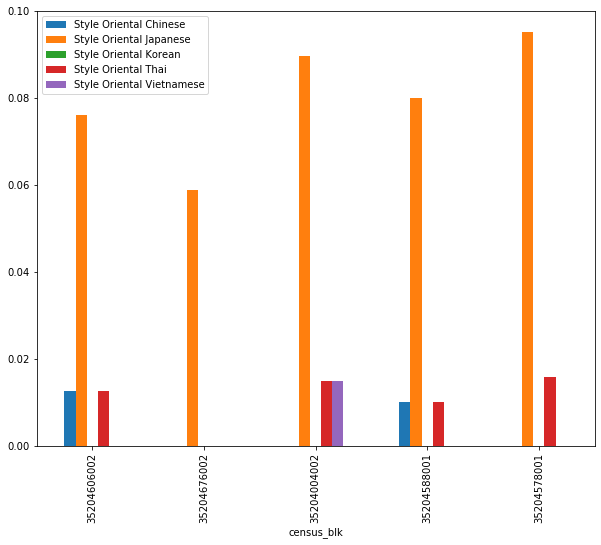

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

toronto_merged_C1_display.plot(x="census_blk", y=["Style Oriental Chinese", "Style Oriental Japanese", "Style Oriental Korean", "Style Oriental Thai", "Style Oriental Vietnamese"], kind="bar", figsize=(10, 8))

#### From the above Histogram, we can see that location blocks 35204004002 and 35204578001 are having Very Strong Preference to Oriental Style food with existing restaurants for other countries (Japanese, Thai or Vietnamese), but not with Oriental Chinese Style; thus, those two locations, particularly, might be the BEST location candidates for opening up new Oriental Chinese Style Food restaurant.plt.show()

#### From the above Histogram, we can see that location blocks 35204004002 and 35204578001 are having Very Strong Preference to Oriental Style food with existing restaurants for other countries (Japanese, Thai or Vietnamese), but not with Oriental Chinese Style; thus, those two locations, particularly, might be the BEST location candidates for opening up new Oriential Chinese Style Food restaurant. 

#### Let's find the physical addresses for all the location candidates with Cluster 1, so stack holders/ restaurant investors can have site visit to the locations:
#### We use **reverse geocode** to get the actual physical addresses of the Cluster 1 locations.

In [36]:
toronto_merged_C1_reset_i = toronto_merged_C1.reset_index()


from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="physical_address_lookup")

def getPhysicalAddress(names, latitudes, longitudes):
    for name, lat, lng in zip(names, latitudes , longitudes):
        print('Census Block: ' ,  name)
        print('Geo Coordinate: ' + str(lat) + ", " + str(lng))
        location = geolocator.reverse([str(lat) + ", " + str(lng)])
        print("Address : ",  location.address)
        print()
    print()    

In [37]:
print('==============================================================')
print('Addresses of recommended locations for new Chinese Restaurant:')
print('==============================================================\n')

getPhysicalAddress(names=toronto_merged_C1_reset_i['census_blk'],
                   latitudes=toronto_merged_C1_reset_i['Latitude'],
                   longitudes=toronto_merged_C1_reset_i['Longitude']
                  )    

Addresses of recommended locations for new Chinese Restaurant:

Census Block:  35204606002
Geo Coordinate: 43.660529, -79.383812
Address :  College Park, Underground walkway, Discovery District, University—Rosedale, Old Toronto, Toronto, Ontario, M5G 2C8, Canada

Census Block:  35204676002
Geo Coordinate: 43.625756, -79.478291
Address :  Annie Craig Drive, Mimico By-The-Lake, Etobicoke—Lakeshore, Etobicoke, Toronto, Golden Horseshoe, Ontario, M8V 4C5, Canada

Census Block:  35204004002
Geo Coordinate: 43.664486, -79.376103
Address :  437, Jarvis Street, Church-Wellesley Village, Toronto Centre, Old Toronto, Toronto, Ontario, M4Y 2G6, Canada

Census Block:  35204588001
Geo Coordinate: 43.659753, -79.381041
Address :  Ronald McDonald House, 26, Gerrard Street East, Downtown Yonge, Toronto Centre, Old Toronto, Toronto, Ontario, M5B 1G7, Canada

Census Block:  35204578001
Geo Coordinate: 43.670429999999996, -79.38174599999999
Address :  Bloorwalk, Hayden Street, University—Rosedale, Old To

#### Let's have a Map Visualization to the Final Five Recommended Best location candidates for new Chinese Restaurant:

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters = 1

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_C1_reset_i['Latitude'], toronto_merged_C1_reset_i['Longitude'], toronto_merged_C1_reset_i['census_blk'], toronto_merged_C1_reset_i['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters) 

map_clusters


## **Result and Discussion:** <a name="result"></a>

In this Capstone Project - The Battle of Neighborhood, we have set on the goal to find out the best possible location candidates in Toronto for opening up a new Chinese Restaurant.  

Due to the historical immigration reasons and diversified multicultural nature of Toronto, we have used the tools of Data Science to check if there were any preferred activity neighborhood for ethnic groups and to identify which areas would have better preference for new Oriental Chinese style restaurants.
We utilized the Government of Canada 2016 Pseudo-Household Demographic Distribution data, Foursquare API venue data and Python geopy geocoder OpenStreetMap Nominatim database data within this project.
From descriptive statistics and Scatter plot analysis on Toronto’s  2016 Pseudo-Household Demographic Distribution data, we found that Toronto’s neighborhood population were not evenly distributed within the city.  

Since potential client flow is a very important successful factor for newly open restaurant, we had selected and focused our further analysis on location candidates with neighborhood population greater than 2500 according to the census data.  This led us to narrow down to the top 25 most populated location candidates in Toronto.
We had further performed Feature Engineering with our restaurant operation domain knowledge that customers would likely prefer and to try on new restaurant similar to their existing preferred ethnic food style; thus, we utilized Foursquare API venue data on Oriental style foods, to which is a boarder East Asia food category that Oriental Chinese food belongs,  to build on K-means model to further analysis on the Oriental Style food preference clustering trend.

Through K-means model analysis, we had grouped the above locations into three main clusters (i.e. Cluster 1 which has High interest to Oriental style food; Cluster 0 which has Medium general interest to Oriental food style restaurant; Cluster 2 which has Low interest to Oriental food with not much existing Oriental food restaurants).

Within the Cluster 1 of High interest to Oriental style food, we had five recommended location candidates for new Oriental Chinese restaurant.   Particular interest are to the location blocks 35204004002 and 35204578001, which indicated strong existing preference to Oriental style food with restaurants of other Oriental country styles (Japanese, Thai and Vietnamese), according to Foursquare venue data, with no existing Oriental Chinese restaurants nearby.

By reverse geocode, we’ve got the actual physical addresses of the Cluster 1 five recommended location candidates, and we observed that four of the five location candidates were at the Mid-Downtown area along the famous Yonge Street and the other remaining one was at the Harbor Front Downtown area near the Ontario Lake shore.  Both areas were recently having many new luxury condos built, and this seemed to further indicate these five recommended locations’ potential for success with a new Chinese restaurant.


## **Conclusion:** <a name="conclusion"></a>
Purpose of this project is to utilize Foursquare location and venue data, together with Government of Canada census population data, to aid stakeholder in finding recommended location candidates for new Chinese restaurant using various Data Science methodology and model.  Five recommended location candidates had been identified with their high population and strong existing preference trend to Oriental food style similar to Oriental Chinese food. 

We would recommend to use these five recommended location candidates as starting point for final exploration by stakeholders through actual site visit, and may want to consider further analysis on real estate availability, rental cost, parking facilities etc to further fine tuning on the final decision to optimize the success of the new Chinese restaurant startup.

## **References:** <a name="reference"></a>

  * **[1]** Toronto - Wikipedia
  
  * **[2]** Government of Canada, Open Government, Pseudo-Household Demographic Distribution  
      (https://open.canada.ca/data/en/dataset/b3a1d603-19ca-466c-ae95-b5185e56addf)
    
      Publisher : Current Organization Name: Innovation, Science and Economic Development Canada
      
      Licence: Open Government Licence - Canada (https://open.canada.ca/en/open-government-licence-canada)
    
  * **[3]**  www.foursquare.com
    Base URI:  api.foursquare.com/v2
  * **[4]** geopy geocoder classes for the OpenStreetMap Nominatim
    (http://nominatim.org/)